<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday17052022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
!pip install basemap
!pip install geopy

import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from matplotlib.lines import Line2D

In [2]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-05-17 20:40:01--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-05-17 20:40:02--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc.1’

Avenir.ttc.1        100%[===================>]   1.56M  --.-KB/s    in 0.007s  

2022-05-17 20:40:02 (217 MB/s) - ‘Avenir.ttc.1’ saved [1639536/1639536]

/content/Avenir.ttc


In [210]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-17/eurovision-votes.csv')

# Filter
setyear = 2021

df = df[(df.year == setyear) & (df['jury_or_televoting'] == 'T') & (df['semi_final'] == 'f' ) & (df.points != 0)]
df_unfiltered = df  # save a copy of the unfiltered data


# Correct Georgia issue
df.from_country.loc[df.from_country == 'Georgia'] = 'Sakartvelo'
df.from_country.loc[df.to_country == 'Georgia'] = 'Sakartvelo'

# Limiting to one country
#df = df[(df.from_country == 'Latvia')]

# Simplify by only taking the votes that gave the highest points
df = df[df.points >= 12]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [211]:
# Add Geodata
geolocator = Nominatim(user_agent="veritashxh")
for row in df.itertuples():
  df.loc[row[0], 'from_lon'] = geolocator.geocode(row[5]).longitude
  df.loc[row[0], 'from_lat'] = geolocator.geocode(row[5]).latitude
  df.loc[row[0], 'to_lon'] = geolocator.geocode(row[6]).longitude
  df.loc[row[0], 'to_lat'] = geolocator.geocode(row[6]).latitude
  #print(row[6])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [212]:
# Correct Georgia issue
df.from_country.loc[df.from_country == 'Georgia'] = 'Sakartvelo'
df.from_country.loc[df.to_country == 'Georgia'] = 'Sakartvelo'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [213]:
# Preview data
df
#df.describe()

,year,semi_final,edition,jury_or_televoting,from_country,to_country,points,duplicate,from_lon,from_lat,to_lon,to_lat
50986,2021,f,2021f,T,Greece,Cyprus,12,NaN,21.987713,38.995368,33.145128,34.982302
51000,2021,f,2021f,T,Russia,Cyprus,12,NaN,97.745306,64.686314,33.145128,34.982302
51020,2021,f,2021f,T,Estonia,Finland,12,NaN,25.331908,58.752378,25.920916,63.246778
51025,2021,f,2021f,T,Iceland,Finland,12,NaN,-18.105901,64.984182,25.920916,63.246778
51043,2021,f,2021f,T,Sweden,Finland,12,NaN,14.520858,59.674971,25.920916,63.246778
51052,2021,f,2021f,T,Belgium,France,12,NaN,4.666715,50.640281,1.888334,46.603354
51074,2021,f,2021f,T,Portugal,France,12,NaN,-7.889626,40.033263,1.888334,46.603354
51080,2021,f,2021f,T,Spain,France,12,NaN,-4.837979,39.326068,1.888334,46.603354
51083,2021,f,2021f,T,The Netherlands,France,12,NaN,5.541247,52.247650,1.888334,46.603354
51131,2021,f,2021f,T,Cyprus,Greece,12,NaN,33.145128,34.982302,21.987713,38.995368


['Albania', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Cyprus', 'Finland', 'France', 'Greece', 'Iceland', 'Israel', 'Italy', 'Lithuania', 'Malta', 'Moldova', 'Norway', 'Portugal', 'Russia', 'San Marino', 'Serbia', 'Sweden', 'Switzerland', 'Ukraine']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


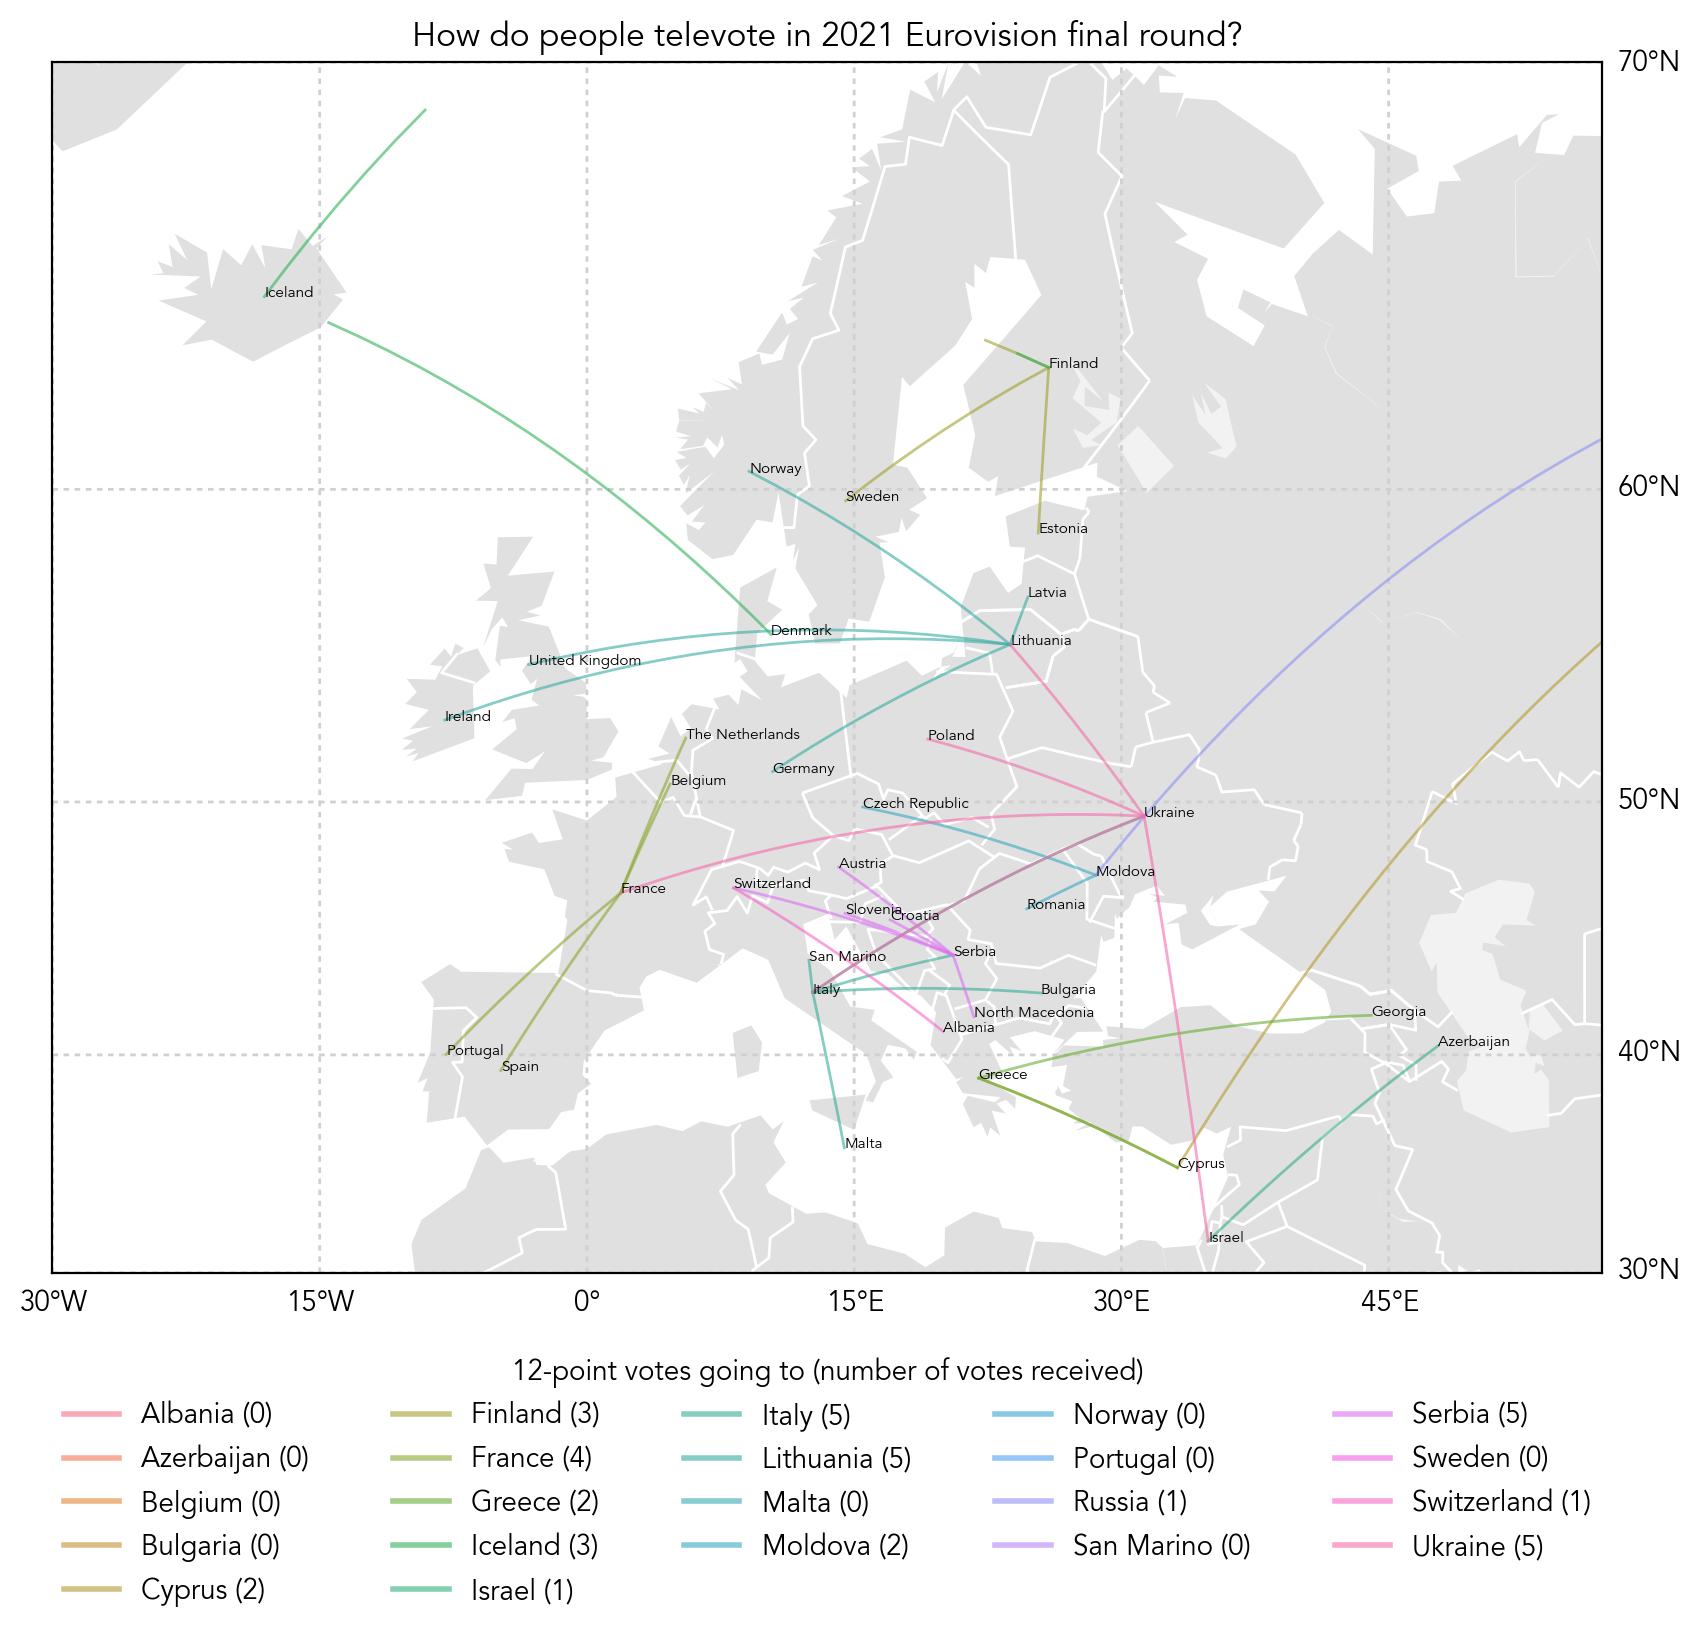

In [216]:
# Figure cell
plt.figure(figsize=(10,10), dpi=200, 
           facecolor='w',
           #frameon=False
           )

# Draw map
m = Basemap(#llcrnrlon=df['from_lon'].min(), llcrnrlat=df['from_lat'].min(),  # lowerbond restricting to europe
            #urcrnrlon=df['from_lon'].max(), urcrnrlat=df['from_lat'].max(),   # upperbond restricting to europe
            llcrnrlon=-30, llcrnrlat=30, 
            urcrnrlon=57, urcrnrlat=70,
            #lat_1=30, lon_0=-30,
            projection='merc')
#m.drawmapboundary(fill_color='white', linewidth=1)
m.fillcontinents(color='#cccccc', alpha=0.6)
m.drawcountries(linewidth=1, linestyle='solid', color='white')

# Draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),
                labels=[False,True,False,False],
                color='#d0d0d0',
                dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),
                labels=[False,False,False,True],
                color='#d0d0d0',
                dashes=[2,2])


# Draw data
c_list = list(df_unfiltered.to_country.unique())  # Get a list of countries
print(c_list)
palette = sns.color_palette("husl", len(c_list))  # Generate a colour palette
#print(palette[c_list.index('Austria')])


for row in df.itertuples():
  m.drawgreatcircle(row[9], row[10], # startlon, startlat
                    row[11], row[12],  # endlon, endlat
                    #linewidth=row[7] / 6,  # points
                    linewidth=1,
                    color=palette[c_list.index(row[6])],  # by to country
                    alpha=row[7] / 20,
                    label=row[6],
                    )
  #print(row[0])

# Correct back Georgia issue
df.from_country.loc[df.from_country == 'Sakartvelo'] = 'Georgia'
df.from_country.loc[df.to_country == 'Sakartvelo'] = 'Georgia'

# Label diagram
grouped = df.groupby('from_country').mean()
grouped = grouped[(grouped.index != 'Australia') & (grouped.index != 'Russia')]  # Hide for layout

for i, row in grouped.iterrows():
  #print(row.name)
  x, y = m(row.from_lon, row.from_lat)
  plt.text(x, y, row.name, 
           fontdict={'size':5.5})


# Figure tweaking
plt.title(f'How do people televote in {setyear} Eurovision final round?')
#c_list[c_list.index('Sakartvelo')] = 'Georgia'
legend_elements = [Line2D([0], [0], 
                          color=palette[i], 
                          lw=2,
                          alpha=0.6, 
                          label=f'{c_list[i]} ({len(df[df.to_country == c_list[i]])})') for i in range(len(c_list))]
#'''                          
plt.legend(handles=legend_elements, 
           bbox_to_anchor=(0, -0.03, 1, -0.03), 
           loc='upper left',
           ncol=5, 
           mode="expand",
           borderaxespad=0.,
           frameon=False,
           title='12-point votes going to (number of votes received)')
#'''


plt.show()